# INT 254  PROJECT

## TOPIC => IMDB BOX OFFICE PREDICTION

## By:
- Gurneet Singh - 12011287 - RKM119A15
- Rishabh Kumar - 12013716 - RKM119B46

Libraries Used :
- Numpy
- Pandas
- MatplotLib
- Seaborn
- Scikit-Learn

In [1052]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

### Reading Data and some cleaning

> Reading the data from 'data.csv' file <br/>
> Cleaning the data as :
>> - Coverting ratings out of 10 [float] to out of 100[int]
>> - Also rounding off the values to nearest 5 <br/>
>> - Converting budget and gross to millions[int] <br/>
>> - Dropping some columns like 'title','link','genre','2nd major cast' <br/>
>> - Dropping rows with null/nan values <br/>
>> - The shuffling data in random order

In [1053]:
df = pd.read_csv('data.csv',index_col=0)

df['rating'] = ((np.floor(df['rating'] * 2) / 2)*10).astype('int')
#df['rating'] = ((round(df['rating'] * 2) / 2)*10).astype('int')
df['gross'] = (df['gross']/1000000).astype('int')
df['budget'] = (df['budget']/1000000).astype('int')

df = df.drop(df.columns[[0,1,7,11]],axis=1)
df.dropna(how='any',inplace=True)
df = df.reindex(np.random.permutation(df.index))
df

,duration,rating,year,director,major cast,certification,gross,votes,budget
285,86,80,1988,Hayao Miyazaki,Hitoshi Takagi,U,1,337805,3
312,89,80,1960,Ingmar Bergman,Max von Sydow,A,1,29552,0
539,76,75,1993,Henry Selick,Danny Elfman,U,75,337373,18
145,130,80,2018,Peter Farrelly,Viggo Mortensen,UA,85,486124,23
603,127,75,2016,Theodore Melfi,Taraji P. Henson,UA,169,229696,25
...,...,...,...,...,...,...,...,...,...
605,103,75,2017,Paul King,Ben Whishaw,U,40,78952,40
255,80,80,2004,Richard Linklater,Ethan Hawke,A,5,263917,2
492,127,75,2012,Michael Haneke,Jean-Louis Trintignant,UA,6,100810,8
602,106,75,2017,Christopher Nolan,Fionn Whitehead,UA,188,653210,100


In [1054]:
df.isnull().sum()

duration         0
rating           0
year             0
director         0
major cast       0
certification    0
gross            0
votes            0
budget           0
dtype: int64

### Visualising Data on Seaborn to find some relations:


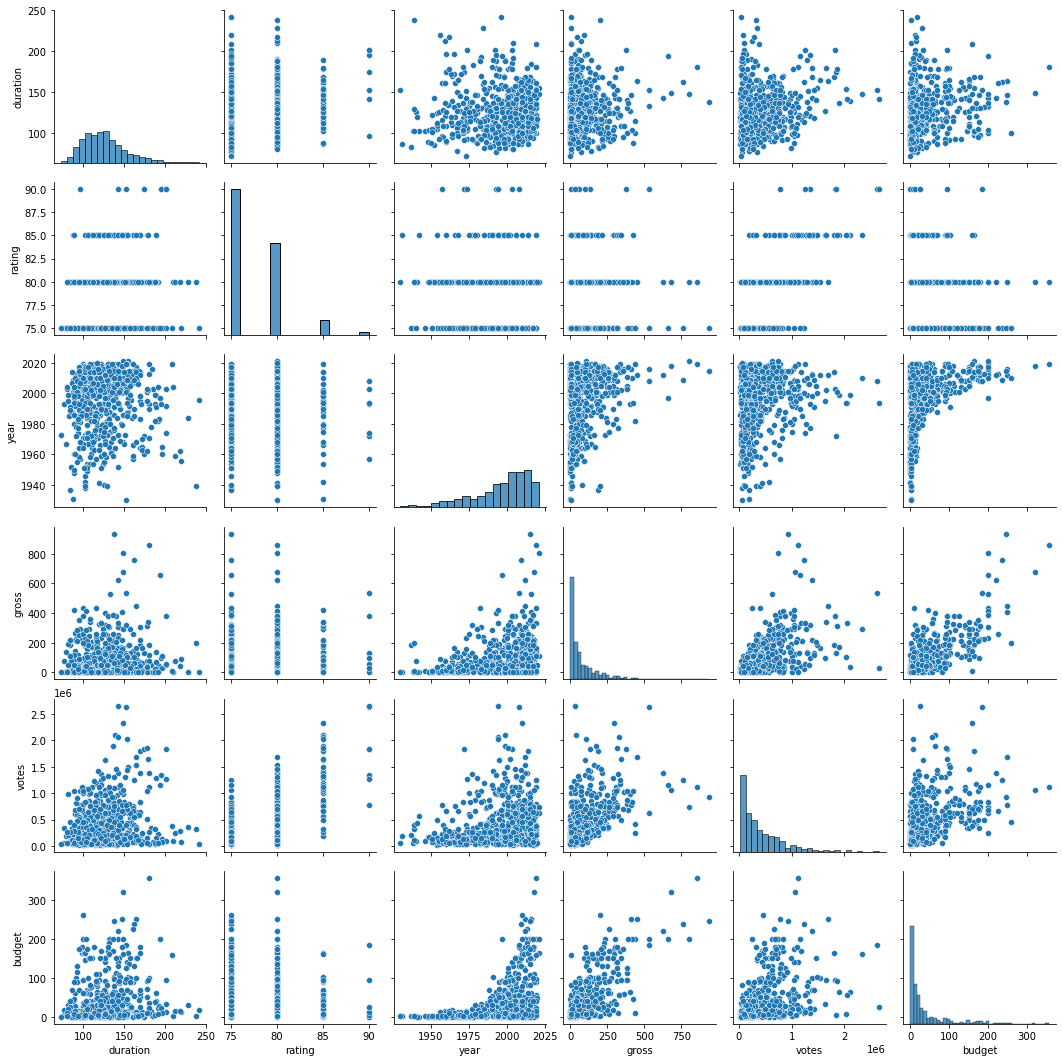

In [1055]:
sns.pairplot(df)

### Label Encoding Categorical Values

> List of Categorical Values - Year, Director, Major Cast, Certification <br/>
> Exporting the data as 'temp_data.csv' for future use

In [1039]:
#Label encoding for categorical - Converting 11 cols with yes/no

from sklearn.preprocessing import LabelEncoder
def labelling(x):
    df[x] = LabelEncoder().fit_transform(df[x])
    return df

cat = ['year', 'director','major cast','certification']

for i in cat:
    labelling(i)

df.to_csv('temp_data.csv',index=False)

In [991]:
df

,duration,rating,year,director,major cast,certification,gross,votes,budget
360,118,80,70,218,430,14,138,679925,15
770,115,75,73,11,54,16,17,118709,12
458,85,80,13,105,155,14,9,104778,0
403,129,80,55,384,56,6,57,617262,29
365,155,80,81,81,424,16,108,621960,165
...,...,...,...,...,...,...,...,...,...
833,89,75,59,258,366,13,10,267424,10
151,135,80,72,387,186,16,0,36519,0
690,76,75,53,213,47,11,5,51409,6
170,111,80,63,306,439,6,70,1108875,30


### Importing Important libraries such as keras and train_test_split

> Making train and test data
>> - X contains features = [duration,year,director,major cast,certification,gross,votes,budget]
>> - Y contains Target = [rating]

In [1040]:
from tensorflow.keras.utils import to_categorical
# import pandas as pd
from sklearn.model_selection import train_test_split

In [1041]:
X = df.drop('rating', axis=1) # features
y = df['rating'] # target value

In [1042]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, shuffle=True,random_state=1500)

In [1043]:
y_test

13     85
291    80
215    80
70     80
292    80
       ..
18     85
22     85
250    80
443    80
358    80
Name: rating, Length: 67, dtype: int32

## Importing :

- Pipelines
- StandardScaler
- Logistic Regression
- Ridget Classifer
- Random Forest Classifier
- Gradient Boosting Classifier

## Also, fitting and predicting model, testing the model on test data

In [1044]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [1045]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

In [1047]:
list(pipelines.values())[0]

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [1048]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

In [1049]:
fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())])}

In [1050]:
fit_models['rc'].predict(X_test)

array([80, 75, 75, 80, 75, 75, 75, 75, 75, 75, 75, 75, 75, 80, 80, 75, 75,
       80, 75, 80, 75, 75, 75, 75, 75, 80, 75, 80, 75, 80, 75, 75, 75, 75,
       75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75,
       75, 75, 80, 75, 75, 75, 75, 75, 80, 75, 75, 80, 80, 75, 75, 75])

### Importing Accuracy Score to check the Accuracy Score of the models

In [1024]:
from sklearn.metrics import accuracy_score # Accuracy metrics 
import pickle 

In [1025]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print(algo, accuracy_score(y_test, yhat))

lr 0.746268656716418
rc 0.6716417910447762
rf 0.7611940298507462
gb 0.7910447761194029


### The Model with the best Accuracy Score => Gradient Boost
### Accuracy = 79.1% approx.

In [1057]:
fit_models['gb'].predict(X_test)    #Testing the model in X_test

array([85, 80, 75, 80, 75, 80, 75, 75, 75, 75, 75, 80, 80, 80, 90, 80, 75,
       85, 75, 85, 80, 75, 75, 80, 75, 85, 80, 80, 75, 80, 80, 80, 80, 75,
       75, 75, 75, 75, 80, 75, 80, 75, 75, 75, 75, 75, 80, 80, 75, 75, 80,
       75, 75, 80, 75, 75, 75, 75, 75, 80, 75, 75, 85, 90, 80, 80, 75])

In [1059]:
fit_models['gb'].predict([[142,54,101,420,6,28,2657521,25]]) 
#Testing the Model on Random Data/Data taken from temp_data

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([90])